In [89]:
#Load imp lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Stats Libs
from arch import arch_model
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [102]:
#load data for TATA Steel
data = pd.read_csv('D:/NLP Course/SMA/Tata Steel - 2 Yr Data.csv')
#inverse the data - start from past to present
data = data.iloc[::-1]

In [147]:
#Convert it to datetime from object
data['Date']= pd.to_datetime(data.Date)
data.head(1)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
491,2019-01-01,39.6,41.3,38.75,39.9,39.778133,214867,1069,8547008,75145,34.97,2.55,0.3


Text(0.5, 1.0, 'TATA Steel Stock Price')

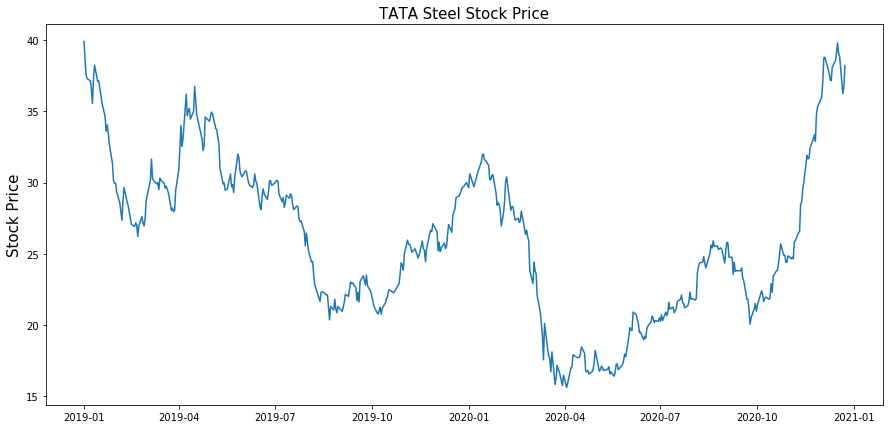

In [149]:
plt.figure(figsize=(15,7))
plt.plot(data['Date'],data['Close Price'])
plt.ylabel('Stock Price', fontsize=15)
plt.title('TATA Steel Stock Price', fontsize=15)

In [103]:
#get time sequenced delta returns
returns = 100 * data['Close Price'].pct_change().dropna()

Text(0.5, 1.0, 'Daily Stock Returns')

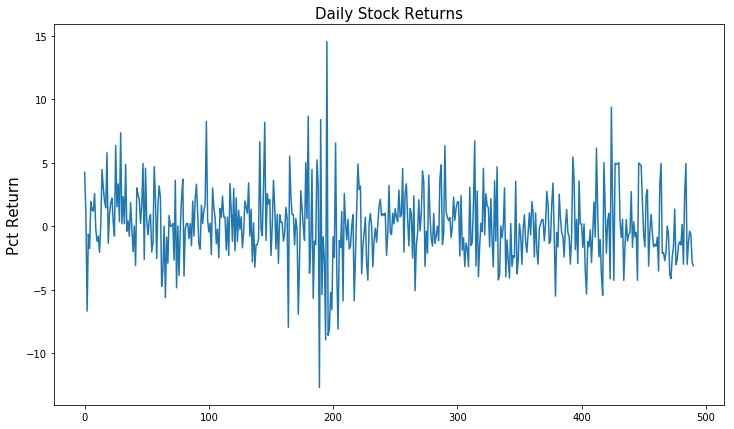

In [151]:
#Plot the tiem delta to see the volatility
plt.figure(figsize=(12,7))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=15)
plt.title('Daily Stock Returns', fontsize=15)

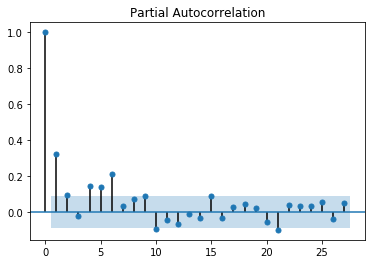

In [105]:
#Lets perform PACF to get some sense about p & q values
plot_pacf(returns**2)
plt.show()

In [163]:
#Test shuts down fast after 3rd samples (0,1,2...) so we can choose below values  
P =2 
Q= 0 

#Run the GARCH model
model = arch_model(returns, p=P, q=Q)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1214.5536765531047
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1206.8609650957524
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1200.6946168547497
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1200.1042623791736
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1198.5151777185206
Iteration:      6,   Func. Count:     44,   Neg. LLF: 1198.5067218658871
Iteration:      7,   Func. Count:     51,   Neg. LLF: 1198.3257814746216
Iteration:      8,   Func. Count:     57,   Neg. LLF: 1198.3094174812215
Iteration:      9,   Func. Count:     63,   Neg. LLF: 1198.3077351235409
Iteration:     10,   Func. Count:     69,   Neg. LLF: 1198.3077211426212
Iteration:     11,   Func. Count:     75,   Neg. LLF: 1198.3077181482845
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1198.3077181483027
            Iterations: 11
            Function evaluations: 75
            Gradient ev

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:            Close Price   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -1198.31
Distribution:                  Normal   AIC:                           2404.62
Method:            Maximum Likelihood   BIC:                           2421.40
                                        No. Observations:                  491
Date:                Thu, Dec 24 2020   Df Residuals:                      487
Time:                        17:35:46   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0905      0.127      0.712      0.476 [ -0.158,  0.339]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          5.8565      0.642      9.117  7.733e-20    [  4.597,  7.116]
alpha[1]       0.2217  7.861e-02      2.820  4.800e-03  [6.762e-02,  0.376]
alpha[2]       0.0612  6.284e-02      0.975      0.330 [-6.191e-02,  0.184]
===========================================================================

Covariance estimator: robust
"""

In [169]:
#Lets get the rolling predictions for past one year 
rolling_predictions = []
test_size = ONE_YR = 365 

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=P, q=Q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [170]:
#Get rolling predictions for a year
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

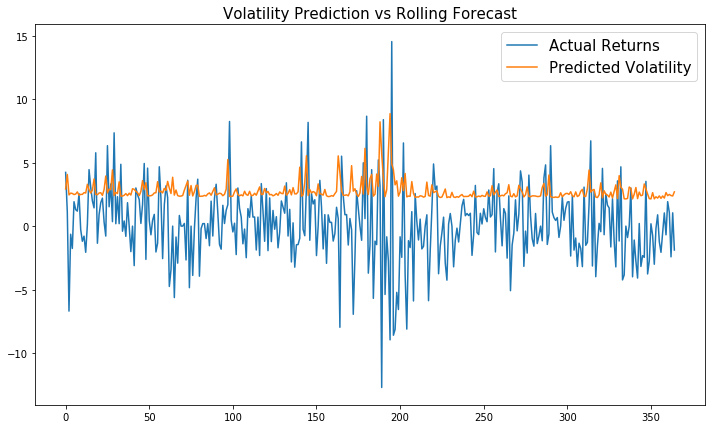

In [171]:
plt.figure(figsize=(12,7))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction vs Rolling Forecast', fontsize=15)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=15)

In [177]:
NoOfWks = 1
#Get predictions for next two weeks
pred = model_fit.forecast(horizon=7*NoOfWks)
future_dates = [timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next two weeks')

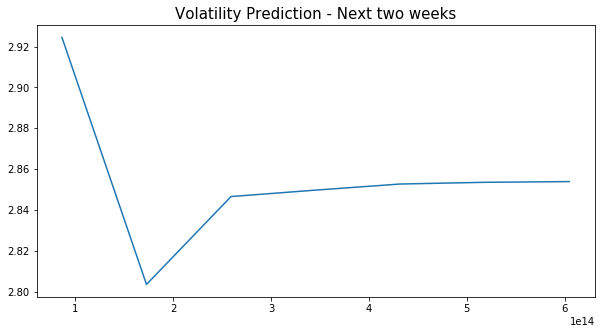

In [178]:
#Plot the predictions for specified duration
plt.figure(figsize=(10,5))
plt.plot(pred)
plt.title('Volatility Prediction - Next two weeks', fontsize=15)